<a href="https://colab.research.google.com/github/gomezan/inteligencia-artificial/blob/main/CodigoKmeansClaseSemana_7_y_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.spatial import distance# por favor buscar la documentacion oficial de la función https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance
from sklearn.preprocessing import StandardScaler# por favor buscar la documentacion oficial de la función
#https://scikit-learn.org/stable/modules/preprocessing.html
%matplotlib inline
#https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

            0         1
0    2.510076  2.159303
1    3.739776  0.974175
2   -0.142930  2.960866
3    2.817929  2.268013
4    2.302407  2.119619
..        ...       ...
590 -2.422920 -1.605852
591 -3.053102 -2.621168
592 -1.352245 -2.281141
593 -2.317628 -3.420102
594 -0.231008 -2.858401

[595 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


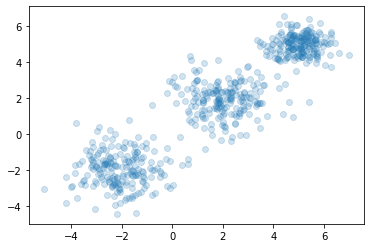

In [ ]:
df = pd.read_csv('cluster_validation_data.txt', sep=",", header=None)
print(df.head(-5))# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
plt.figure()
plt.scatter(df.values[:,0],df.values[:,1],alpha=0.2)#ver: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
print(type(df))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(600, 2)
<class 'numpy.ndarray'>


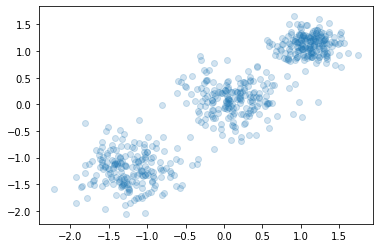

In [ ]:
X=df.values
print(type(df))
print(type(X))
print(X.shape)
sc= StandardScaler()
sc.fit(X)
X=sc.transform(X)
plt.figure()
print(type(X))
plt.scatter(X[:,0],X[:,1],alpha=0.2)#ver: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
def kmedias(X,k,random_state=0,max_iter=100,graficar=False):
  np.random.seed(seed=random_state)#Generamos nuestra semilla iniacial
  idx = np.random.choice(len(X),k,replace=False)
  centroids=X[idx,:]# otra manera sería tomar unos puntos de la misma dimensión de X en filas
  P=np.argmin(distance.cdist(X,centroids,'euclidean'),axis=1)
  for n in range(max_iter):
    if graficar:
      plt.scatter(X[:,0],X[:,1],c=P,alpha=0.1)
      plt.scatter(centroids[:,0],centroids[:,1],alpha=1)
    promedios=[X[P==i,:].mean(axis=0) for i in range(k)]
    centroids=np.vstack(promedios)
    if graficar:
      print(centroids)
      plt.scatter(centroids[:,0],centroids[:,1],alpha=1)
      plt.show()
      time.sleep(1)
    Ptemp=np.argmin(distance.cdist(X,centroids,'euclidean'),axis=1)
    if (np.array_equal(P,Ptemp)):#Salga
      if graficar:
        print("saliendo por no movimiento de los centroides en la iteracion",n+1)
      break
    P=Ptemp

  return P,centroids


[[-0.7222749  -1.2710025 ]
 [ 0.40829602  0.45687079]
 [-1.48459211 -1.3218274 ]]


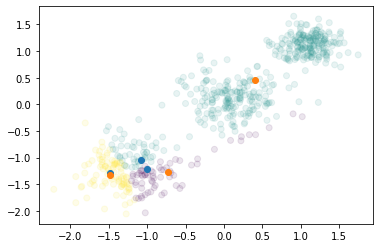

[[-0.82497367 -1.12779052]
 [ 0.62880161  0.63199883]
 [-1.42413934 -1.23309544]]


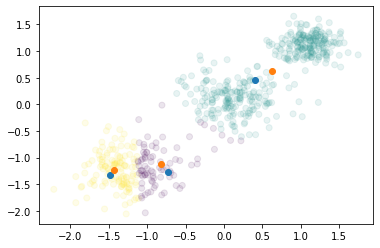

[[-0.73952107 -0.97392372]
 [ 0.65590451  0.66343184]
 [-1.42075029 -1.26355193]]


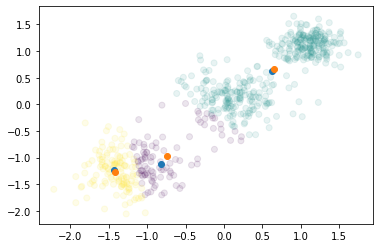

[[-0.5868277  -0.7879309 ]
 [ 0.68518284  0.69981431]
 [-1.37907925 -1.27922173]]


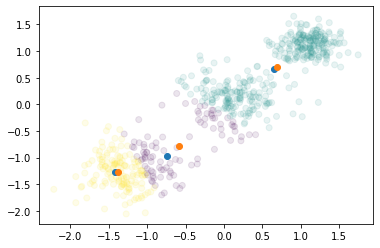

[[-0.37417489 -0.47137574]
 [ 0.75327582  0.75534255]
 [-1.32675826 -1.26984426]]


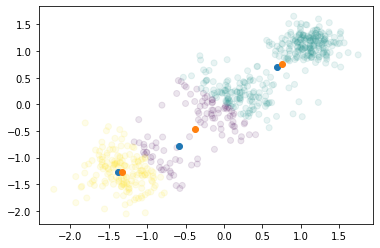

[[-0.09430448 -0.10884466]
 [ 0.8994682   0.89479997]
 [-1.26378226 -1.2462926 ]]


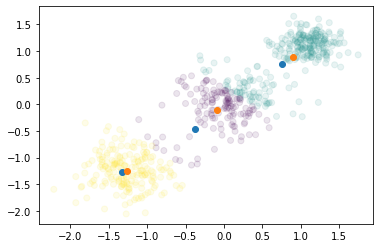

[[ 0.06371802  0.04913707]
 [ 1.05534586  1.06024829]
 [-1.22965165 -1.22190726]]


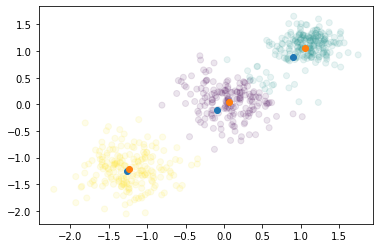

[[ 0.09474321  0.07625194]
 [ 1.09333573  1.10322062]
 [-1.22965165 -1.22190726]]


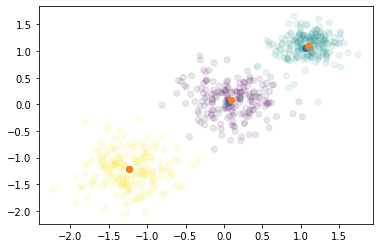

[[ 0.10424282  0.08649346]
 [ 1.1037468   1.1134672 ]
 [-1.22965165 -1.22190726]]


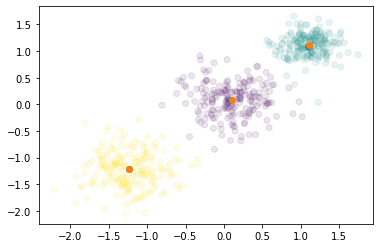

saliendo por no movimiento de los centroides en la iteracion 9


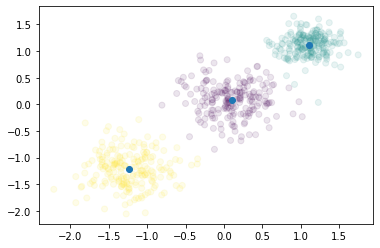

In [ ]:
P,centroids=kmedias(X,k=3,random_state=1,max_iter=10,graficar=True)
plt.scatter(X[:,0],X[:,1],c=P,alpha=0.1)
plt.scatter(centroids[:,0],centroids[:,1],alpha=1)

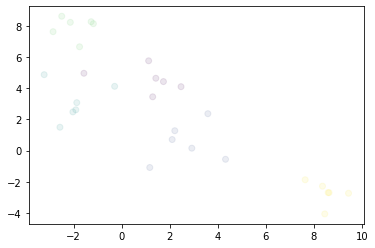

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=30, centers=5, n_features=2,shuffle=True,random_state=0)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.1)
plt.show()

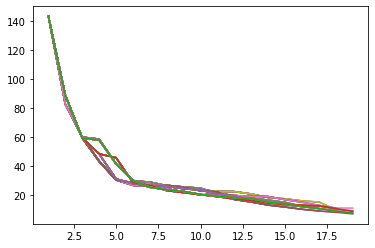

In [ ]:
Kinicial=1
Kfinal=20
step=1
plt.figure()
# me toca iterar esto para diferentes semillas
for m in range(1,8):
  K=[]
  WSS=[]
  for k in range (Kinicial,Kfinal,step):
    #Aqui inicia la evaluación de K-means
    Etiquetas,Centroides=kmedias(X,k,random_state=m,max_iter=100,graficar=False)
    distanciasA2A=distance.cdist(X,Centroides,'euclidean')#esto nos genera una matriz de todas los puntos en X vs los centroides
    sum_de_distancias=[np.sum(distanciasA2A[Etiquetas==l][:,l]) for l in range(0,k,1)]
    WSS.append(np.sum(sum_de_distancias))
    K.append(k) 
    plt.plot(K,WSS)

plt.show()


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.5921574153338273, 0.5082785533906198, 0.36207693190310763, 0.32561185628120565, 0.3103123652139052, 0.43120877821306536, 0.39692222500667157, 0.3785251889446846, 0.36594833671546817, 0.409783576580711, 0.3724577397318151]


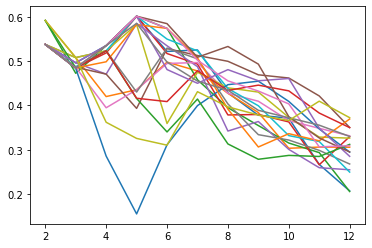

In [ ]:
from sklearn.metrics import silhouette_score
Kinicial=2
Kfinal=13
step=1
plt.figure()
# me toca iterar esto para diferentes semillas
for m in range(1,20):
  Silueta=[]
  K=[]
  for k in range (Kinicial,Kfinal,step):
    #Aqui inicia la evaluación de K-means
    Etiquetas,Centroides=kmedias(X,k=k,random_state=m,max_iter=100,graficar=False)
    Silueta.append(silhouette_score(X,Etiquetas,metric='euclidean'))
    K.append(k) 
  plt.plot(K,Silueta)

print(K)
print(Silueta)
plt.show()



In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [ ]:
kmeans.fit(X)
labels=kmeans.predict(X)

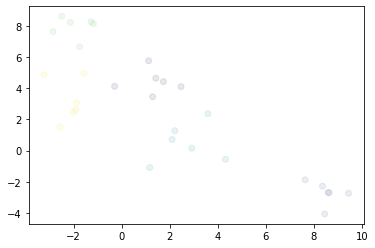

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=labels,alpha=0.1)
plt.show()

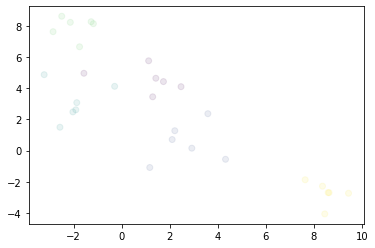

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.1)
plt.show()

In [ ]:
labels-y

array([ 1, -3,  4, -3,  0,  2,  1,  2,  0, -3,  0, -2,  2, -3,  0, -3,  2,
        1,  0,  0,  2,  0,  0, -3,  1,  1,  0,  1,  0,  0])

In [ ]:
Labe  